In [21]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
deliveries = pd.read_csv("deliveries.csv")

In [23]:
match = pd.read_csv("matches.csv")


In [24]:
match.head(10)

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan
5,335987,2007/08,Jaipur,2008-04-21,League,SR Watson,Sawai Mansingh Stadium,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,bat,Rajasthan Royals,wickets,6.0,167.0,20.0,N,NaN,Aleem Dar,RB Tiffin
6,335988,2007/08,Hyderabad,2008-04-22,League,V Sehwag,"Rajiv Gandhi International Stadium, Uppal",Deccan Chargers,Delhi Daredevils,Deccan Chargers,bat,Delhi Daredevils,wickets,9.0,143.0,20.0,N,NaN,IL Howell,AM Saheba
7,335989,2007/08,Chennai,2008-04-23,League,ML Hayden,"MA Chidambaram Stadium, Chepauk",Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,Chennai Super Kings,runs,6.0,209.0,20.0,N,NaN,DJ Harper,GA Pratapkumar
8,335990,2007/08,Hyderabad,2008-04-24,League,YK Pathan,"Rajiv Gandhi International Stadium, Uppal",Deccan Chargers,Rajasthan Royals,Rajasthan Royals,field,Rajasthan Royals,wickets,3.0,215.0,20.0,N,NaN,Asad Rauf,MR Benson
9,335991,2007/08,Chandigarh,2008-04-25,League,KC Sangakkara,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Mumbai Indians,Mumbai Indians,field,Kings XI Punjab,runs,66.0,183.0,20.0,N,NaN,Aleem Dar,AM Saheba


## Basic Issues 
##  1.Team names are too long need to be shorten.
## 2.Many teams have changed their names like punjab , rcb , delhi 
## 3.season are like 2007 08 , 2009 10 , 2020 21 that need to be replace 


In [25]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


## Basic Transformation

In [26]:
match.replace(['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Mumbai Indians', 'Kolkata Knight Riders',
       'Rajasthan Royals', 'Deccan Chargers', 'Chennai Super Kings',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Gujarat Lions', 'Rising Pune Supergiants',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Lucknow Super Giants', 'Gujarat Titans',
       'Royal Challengers Bengaluru'],["RCB","PK","DC","MI","KKR","RR","DCC","CSK","KTK","PW","SRH","GL","RPS","RPS","DC","PK","LSG","GT","RCB"],inplace = True)

In [27]:
deliveries.replace(['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Mumbai Indians', 'Kolkata Knight Riders',
       'Rajasthan Royals', 'Deccan Chargers', 'Chennai Super Kings',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Gujarat Lions', 'Rising Pune Supergiants',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Lucknow Super Giants', 'Gujarat Titans',
       'Royal Challengers Bengaluru'],["RCB","PK","DC","MI","KKR","RR","DCC","CSK","KTK","PW","SRH","GL","RPS","RPS","DC","PK","LSG","GT","RCB"],inplace = True)

In [29]:
match.replace(["2007/08","2009/10","2020/21"],["2008","2010","2020"],inplace=True)

## 1.Player Performance Analysis Batsmen

## 1.1. Top 10 Highest Run Scorer across tournament

In [195]:
max_runs=deliveries.groupby(['batter'])['batsman_runs'].sum()
top_batsmen = max_runs.nlargest(10)

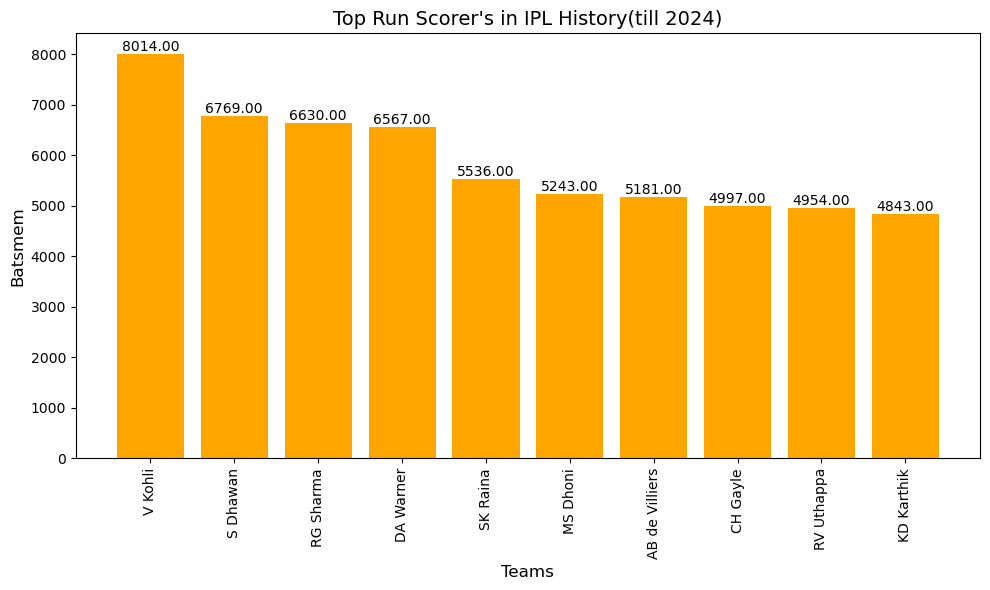

In [196]:
plt.figure(figsize=(10, 6))
bars = plt.bar(top_batsmen.index, top_batsmen.values, color='orange')
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f'{bar.get_height():.2f}', ha='center', va='bottom', fontsize=10)


# Adding title and labels
plt.title("Top Run Scorer's in IPL History(till 2024)", fontsize=14)
plt.xlabel("Teams", fontsize=12)
plt.ylabel("Batsmem", fontsize=12)
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability
plt.tight_layout()
plt.show()

## 1.2 Most 1's ,2's , 3's , 4's ,5's,6's Count of Top Batsmen

In [197]:
run_on_ball=deliveries.groupby(['batter','batsman_runs'])['total_runs'].count().reset_index()
run_on_ball = run_on_ball.pivot(index='batter', columns='batsman_runs', values='total_runs')



<Axes: xlabel='count', ylabel='Top Batsmens'>

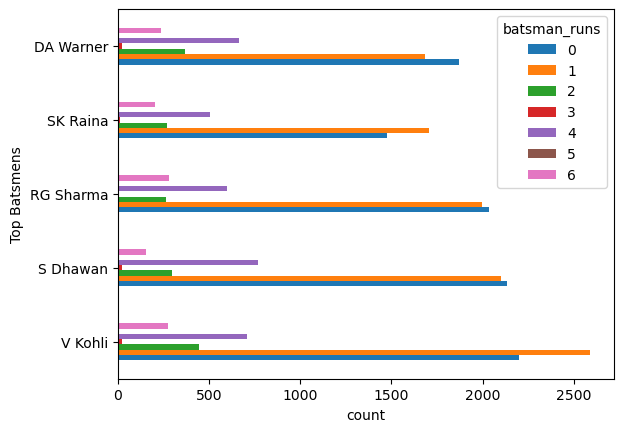

In [198]:
run_on_ball.nlargest(5,1).plot(kind = "barh",xlabel = "count",ylabel="Top Batsmens")

## 1.3 Top Individual Scores

In [199]:
top_scores = deliveries.groupby(["match_id", "batter","batting_team"])["batsman_runs"].sum().reset_index()

top_scores.sort_values('batsman_runs', ascending=0).head(10)


,match_id,batter,batting_team,batsman_runs
5302,598027,CH Gayle,RCB,175
2,335982,BB McCullum,KKR,158
14108,1304112,Q de Kock,LSG,140
7528,829795,AB de Villiers,RCB,133
11583,1216510,KL Rahul,PK,132
15383,1370352,Shubman Gill,GT,129
8359,980987,AB de Villiers,RCB,129
4687,548372,CH Gayle,RCB,128
10149,1136602,RR Pant,DC,128
2237,419137,M Vijay,CSK,127


## 1.4 Player with highest no of centuries

In [200]:
player_scores = deliveries.groupby(['match_id', 'batter'])['batsman_runs'].sum().reset_index()

centuries = player_scores[player_scores['batsman_runs'] >= 100]

century_counts = centuries.groupby('batter').size().reset_index(name='no_of_centuries')

top_century_players = century_counts.sort_values(by='no_of_centuries', ascending=False).head(10)
print(top_century_players)

            batter  no_of_centuries
46         V Kohli                8
17      JC Buttler                7
9         CH Gayle                6
41       SR Watson                4
19        KL Rahul                4
12       DA Warner                4
44    Shubman Gill                4
1   AB de Villiers                3
43       SV Samson                3
16         HM Amla                2


## 1.5 Dismissal Counts for All Top Batsmen

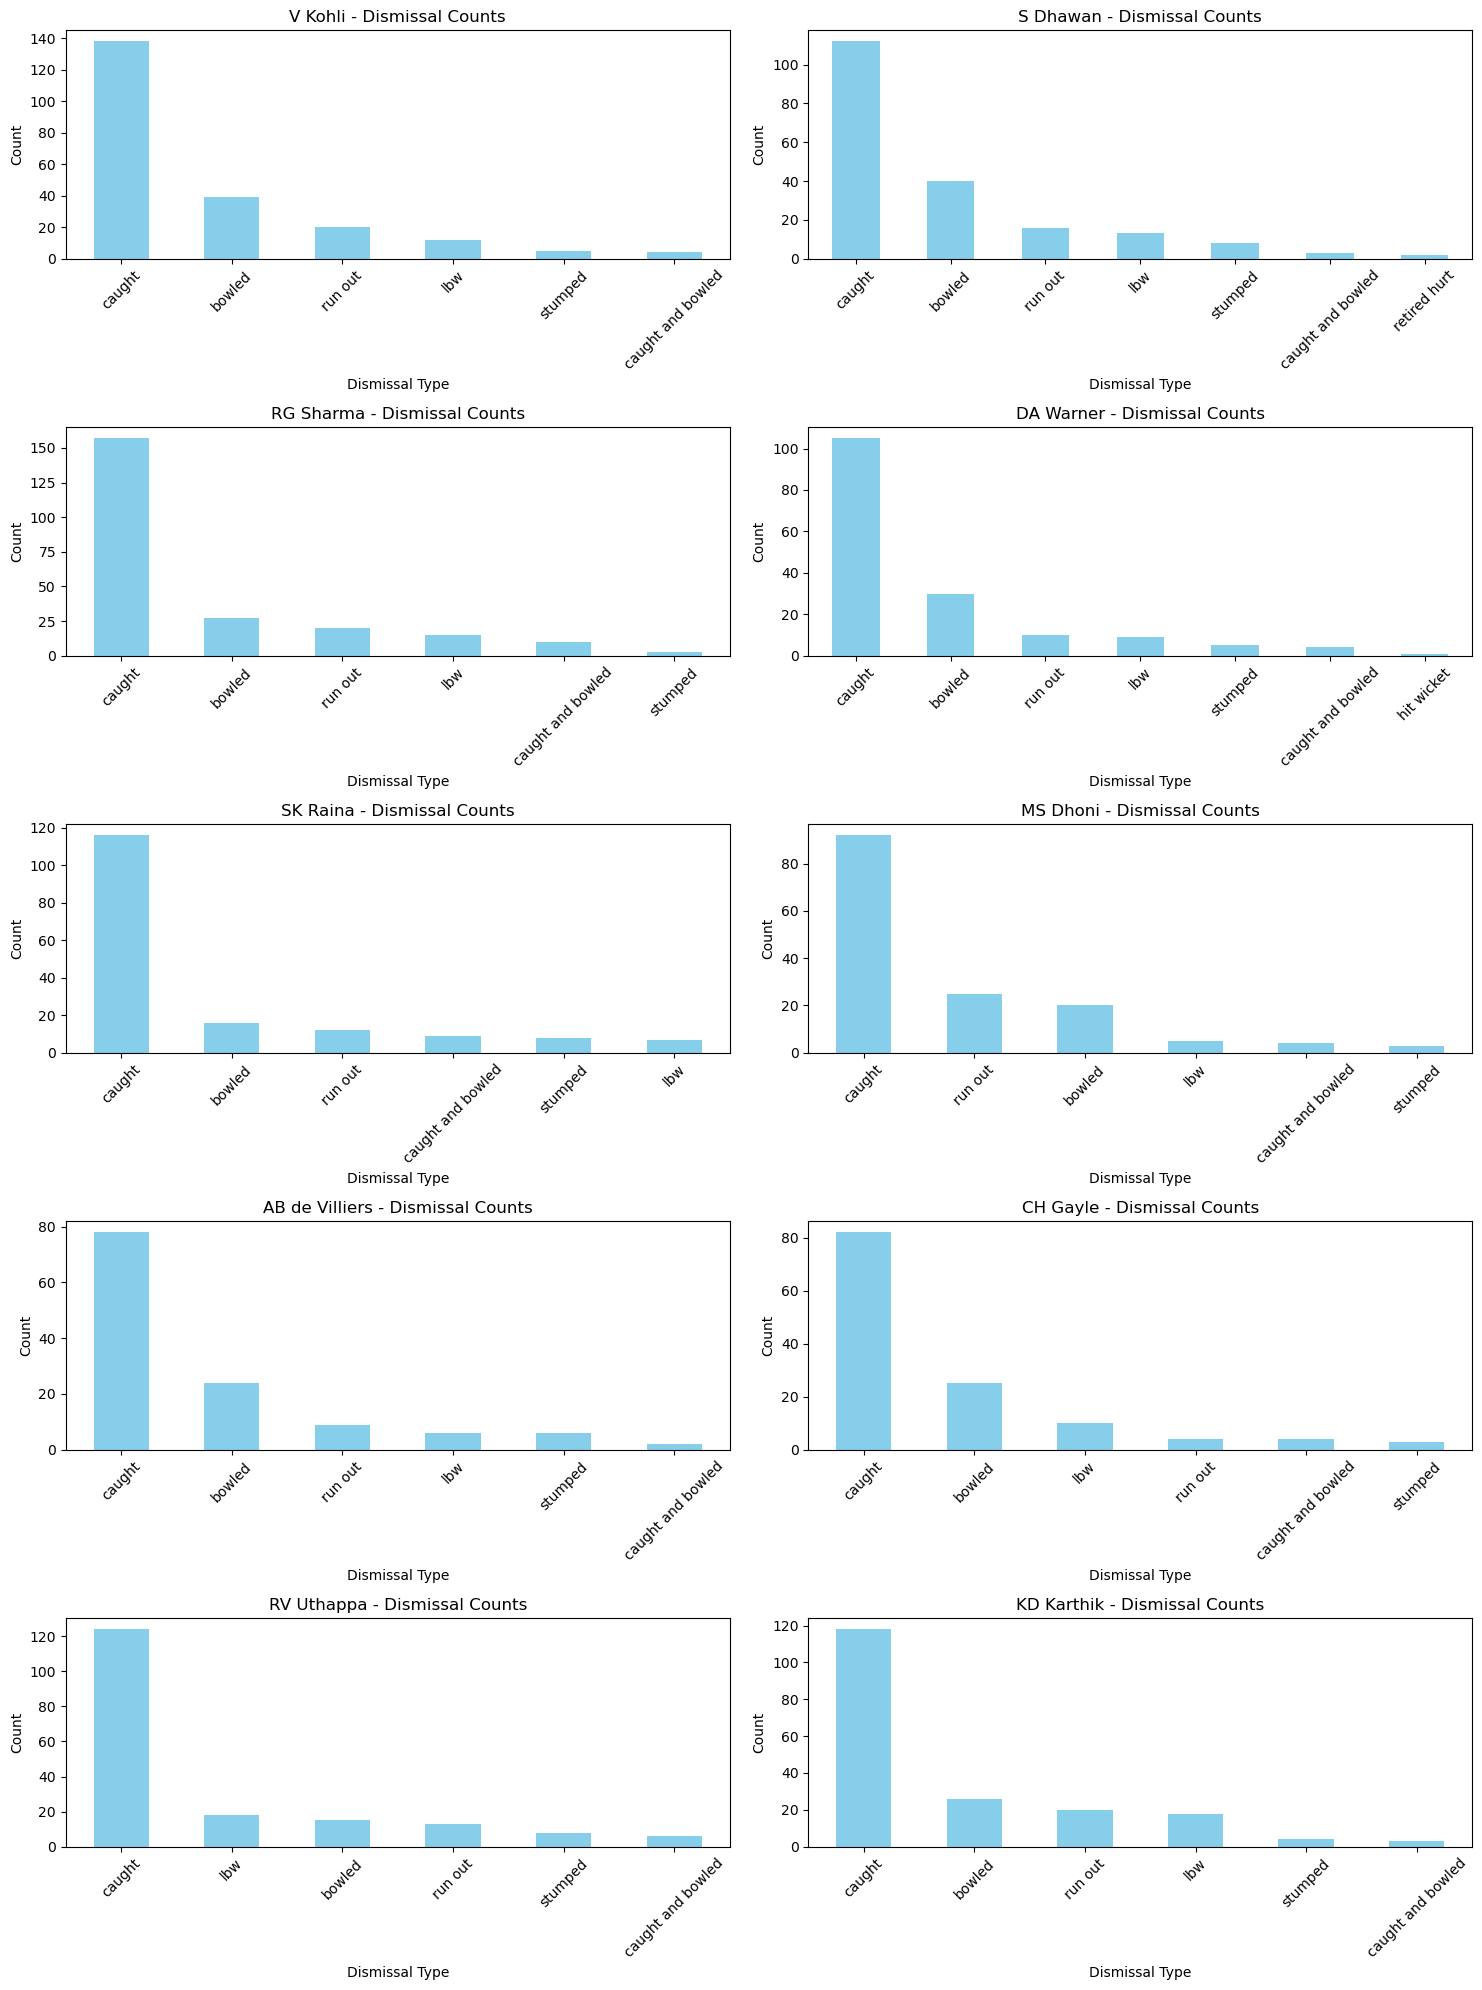

In [201]:

top_batsmen = ['V Kohli', 'S Dhawan', 'RG Sharma', 'DA Warner', 'SK Raina', 
               'MS Dhoni', 'AB de Villiers', 'CH Gayle', 'RV Uthappa', 'KD Karthik']


fig, ax = plt.subplots(5, 2, figsize=(15, 20))  # Adjust the size as needed
ax = ax.flatten()  # Flatten the axes to easily index


for i, batsman_name in enumerate(top_batsmen):
    batsman = deliveries[deliveries['batter'] == batsman_name]
    dismissal_counts = batsman["dismissal_kind"].value_counts()

    dismissal_counts.plot(kind='bar', ax=ax[i], color='skyblue')


    ax[i].set_title(f'{batsman_name} - Dismissal Counts')
    ax[i].set_xlabel('Dismissal Type')
    ax[i].set_ylabel('Count')
    ax[i].tick_params(axis='x', rotation=45)


plt.tight_layout()
plt.show()


## 1.6 Player with highest strike Rate

In [202]:

strike_rate_data = deliveries.groupby('batter').agg(total_runs=('batsman_runs', 'sum'), total_balls=('ball', 'count')).reset_index()
strike_rate_data = strike_rate_data[strike_rate_data['total_balls'] > 300]
# Calculate strike rate for each player
strike_rate_data['strike_rate'] = (strike_rate_data['total_runs'] / strike_rate_data['total_balls']) * 100

# Sort the players by strike rate in descending order and get the top 10
top_10_strike_rate = strike_rate_data.sort_values(by='strike_rate', ascending=False).head(10)

# Display the top 10 players with their strike rates
print(top_10_strike_rate[['batter', 'strike_rate']])


             batter  strike_rate
433         PD Salt   169.610390
617         TM Head   168.558952
39       AD Russell   164.224422
208       H Klaasen   161.990212
612        TH David   158.033573
561       SP Narine   155.894309
396        N Pooran   154.768154
323  LS Livingstone   154.187192
504     Rashid Khan   153.521127
203      GJ Maxwell   150.488599


 ## 2.Player Performance: Bowler

## 2.1 Player with highest number of wickets 

In [203]:
max_wickets=deliveries.groupby(['bowler'])['is_wicket'].sum()
top_bowler = max_wickets.nlargest(10)

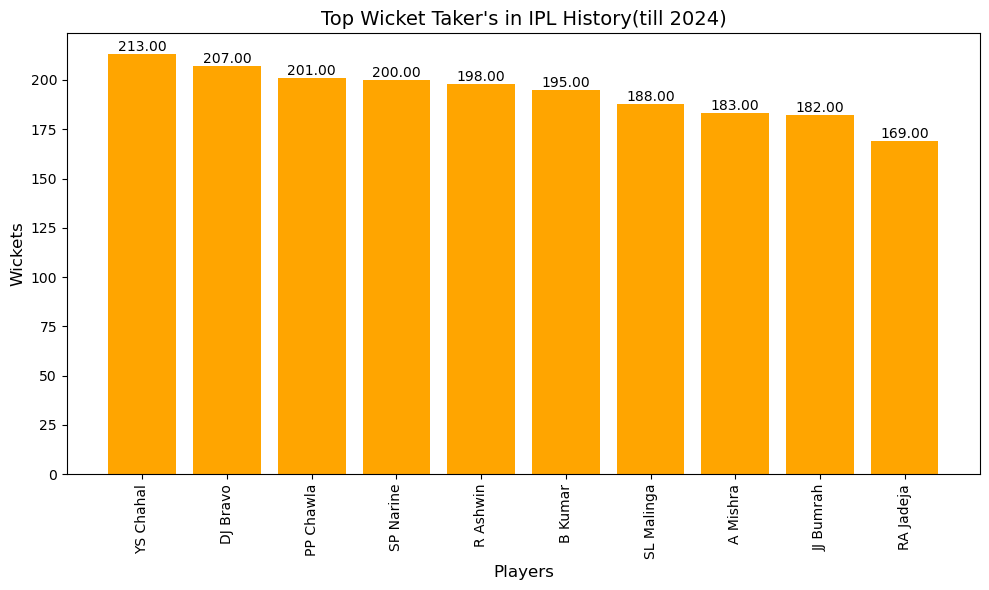

In [204]:
plt.figure(figsize=(10, 6))
bars = plt.bar(top_bowler.index, top_bowler.values, color='orange')
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f'{bar.get_height():.2f}', ha='center', va='bottom', fontsize=10)


# Adding title and labels
plt.title("Top Wicket Taker's in IPL History(till 2024)", fontsize=14)
plt.xlabel("Players", fontsize=12)
plt.ylabel("Wickets", fontsize=12)
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability
plt.tight_layout()
plt.show()

## 2.2 Bowler with highest wickets in last over

In [205]:

# Step 1: Filter deliveries where over == 20 (last over in T20)
last_over_deliveries = deliveries[deliveries['over'] == 19]

# Step 2: Filter rows where a wicket is taken (non-null values in 'dismissal_kind')
wickets_last_over = last_over_deliveries[last_over_deliveries['dismissal_kind'].notnull()]

# Step 3: Group by bowler and count the number of wickets taken in the last over
wickets_by_bowler = wickets_last_over.groupby('bowler')['dismissal_kind'].count().reset_index()

# Step 4: Sort and get the bowler with the most wickets
top_bowler = wickets_by_bowler.sort_values(by='dismissal_kind', ascending=False).head(10)

# Display the result
print(top_bowler[['bowler', 'dismissal_kind']])


             bowler  dismissal_kind
56         DJ Bravo              48
70         HV Patel              41
33          B Kumar              36
169   R Vinay Kumar              29
194  Sandeep Sharma              27
186      SL Malinga              25
133       MM Sharma              25
206        UT Yadav              24
77        IK Pathan              24
85       JD Unadkat              21


## 2.3 Bowler with lowest economy

In [206]:
valid_deliveries = deliveries[deliveries['extra_runs'] == 0]

# Group by bowler to calculate total runs conceded and total balls bowled
bowler_stats = valid_deliveries.groupby('bowler').agg(
    total_runs=('total_runs', 'sum'),
    total_balls=('ball', 'count')
).reset_index()

# Calculate overs bowled by each bowler (total balls / 6)
bowler_stats['total_overs'] = bowler_stats['total_balls'] / 6# Filter bowlers with more than 50 overs
bowlers_with_50_overs = bowler_stats[bowler_stats['total_overs'] > 50].copy()

# Calculate economy rate explicitly using .loc
bowlers_with_50_overs.loc[:, 'economy_rate'] = bowlers_with_50_overs['total_runs'] / bowlers_with_50_overs['total_overs']

# Sort by economy rate in ascending order to get the bowler with the lowest economy
lowest_economy_bowler = bowlers_with_50_overs.sort_values(by='economy_rate').head(10)

# Display the result
print(lowest_economy_bowler[['bowler', 'economy_rate', 'total_overs']])



               bowler  economy_rate  total_overs
7            A Kumble      6.490446   157.000000
263    M Muralitharan      6.630303   247.500000
147        GD McGrath      6.685714    52.500000
446         SP Narine      6.703160   669.833333
138          DW Steyn      6.718765   356.166667
284        MJ Santner      6.727273    60.500000
181           J Yadav      6.742268    64.666667
377  RE van der Merwe      6.750000    72.000000
130        DL Vettori      6.840314   127.333333
398       Rashid Khan      6.855319   470.000000


## 2.4 With minimum 3 wickets in a match

In [207]:

wkt = deliveries.groupby(['match_id', 'bowler'])['is_wicket'].sum().reset_index()


three_wkt = wkt[wkt['is_wicket'] >= 3]


three_wkt_counts = three_wkt.groupby('bowler').size().reset_index(name='min 3 wickets')


top_three_wkt = three_wkt_counts.sort_values(by='min 3 wickets', ascending=False).head(10)


print(top_three_wkt)

         bowler  min 3 wickets
92    JJ Bumrah             29
214  SL Malinga             24
254   YS Chahal             22
240    UT Yadav             21
57     DJ Bravo             21
3      A Mishra             20
139   MM Sharma             19
183   RA Jadeja             18
4       A Nehra             18
71     HV Patel             18


## 2.5 Ratio: Balls per wicket 

In [208]:
total_balls = deliveries.groupby('bowler')['ball'].count().reset_index()
total_wickets = deliveries.groupby('bowler')['is_wicket'].sum().reset_index()

bowling_stats = pd.merge(total_balls, total_wickets, on='bowler')

bowling_stats['balls_per_wicket'] = bowling_stats['ball'] / bowling_stats['is_wicket']

bowling_stats = bowling_stats[bowling_stats['is_wicket'] >= 100]

best_ratio = bowling_stats.sort_values(by='balls_per_wicket').head(15)

print(best_ratio)


             bowler  ball  is_wicket  balls_per_wicket
29       AD Russell  1771        125         14.168000
162        HV Patel  2284        151         15.125828
212        K Rabada  1907        126         15.134921
290       MM Sharma  2308        147         15.700680
438      SL Malinga  2974        188         15.819149
119        DJ Bravo  3296        207         15.922705
10          A Nehra  1974        121         16.314050
94        CH Morris  1801        107         16.831776
524       YS Chahal  3628        213         17.032864
372   R Vinay Kumar  2186        127         17.212598
193       JJ Bumrah  3185        182         17.500000
303  Mohammed Shami  2521        144         17.506944
398     Rashid Khan  2901        157         18.477707
386        RP Singh  1874        100         18.740000
8          A Mishra  3444        183         18.819672


## 3.Team Performance Analysis 

In [209]:
teams = [
    "CSK",
    "MI",
    "RCB",
    "KKR",
    "SRH",
    "DC",
    "PBKS",
    "RR",
    "LSG",
    "GT",
    "DCC",
    "GL",
    "RPS",
    "KTK",
    "PW"
]

## 3.1 Win Percentage of Every Team Tournament Wise

<Axes: xlabel='Teams', ylabel='Win Percentage'>

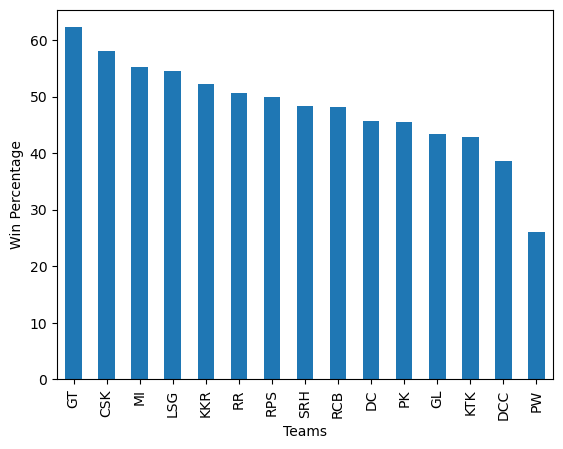

In [210]:
team_matches = (match["team1"].value_counts() + match["team2"].value_counts()).sort_values(ascending=False)
total_wins = match["winner"].value_counts()
team_win_percentage = (total_wins/team_matches*100).sort_values(ascending = False)
team_win_percentage.plot(kind = "bar",xlabel ="Teams",ylabel = "Win Percentage")

In [211]:
print(team_win_percentage)

GT     62.222222
CSK    57.983193
MI     55.172414
LSG    54.545455
KKR    52.191235
RR     50.678733
RPS    50.000000
SRH    48.351648
RCB    48.235294
DC     45.634921
PK     45.528455
GL     43.333333
KTK    42.857143
DCC    38.666667
PW     26.086957
Name: count, dtype: float64


## 3.2 Win Percentage of team  by Season


In [212]:

def plot_team_win_percentage(teams):
    wins_by_season = match.groupby(['season', 'winner']).size().reset_index(name='wins')
    matches_team1 = match.groupby(['season', 'team1']).size().reset_index(name='matches')
    matches_team2 = match.groupby(['season', 'team2']).size().reset_index(name='matches')

    matches_by_season = pd.merge(matches_team1, matches_team2, left_on=['season', 'team1'], right_on=['season', 'team2'], how='outer', suffixes=('_team1', '_team2'))
    matches_by_season['total_matches'] = matches_by_season['matches_team1'].fillna(0) + matches_by_season['matches_team2'].fillna(0)
    matches_by_season.rename(columns={'team1': 'team'}, inplace=True)

    win_percentage_by_season = pd.merge(wins_by_season, matches_by_season[['season', 'team', 'total_matches']],
                                        left_on=['season', 'winner'], right_on=['season', 'team'], how='left')

    win_percentage_by_season['win_percentage'] = (win_percentage_by_season['wins'] / win_percentage_by_season['total_matches']) * 100

    plt.figure(figsize=(14, 8))
    for team in teams:
        team_data = win_percentage_by_season[win_percentage_by_season['team'] == team]
        if not team_data.empty:
            plt.plot(team_data['season'], team_data['win_percentage'], marker='o', label=team)

    plt.title('Win Percentage of Selected IPL Teams by Season')
    plt.xlabel('Season')
    plt.ylabel('Win Percentage')
    plt.xticks(sorted(match['season'].unique()))
    plt.legend(title='Teams', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

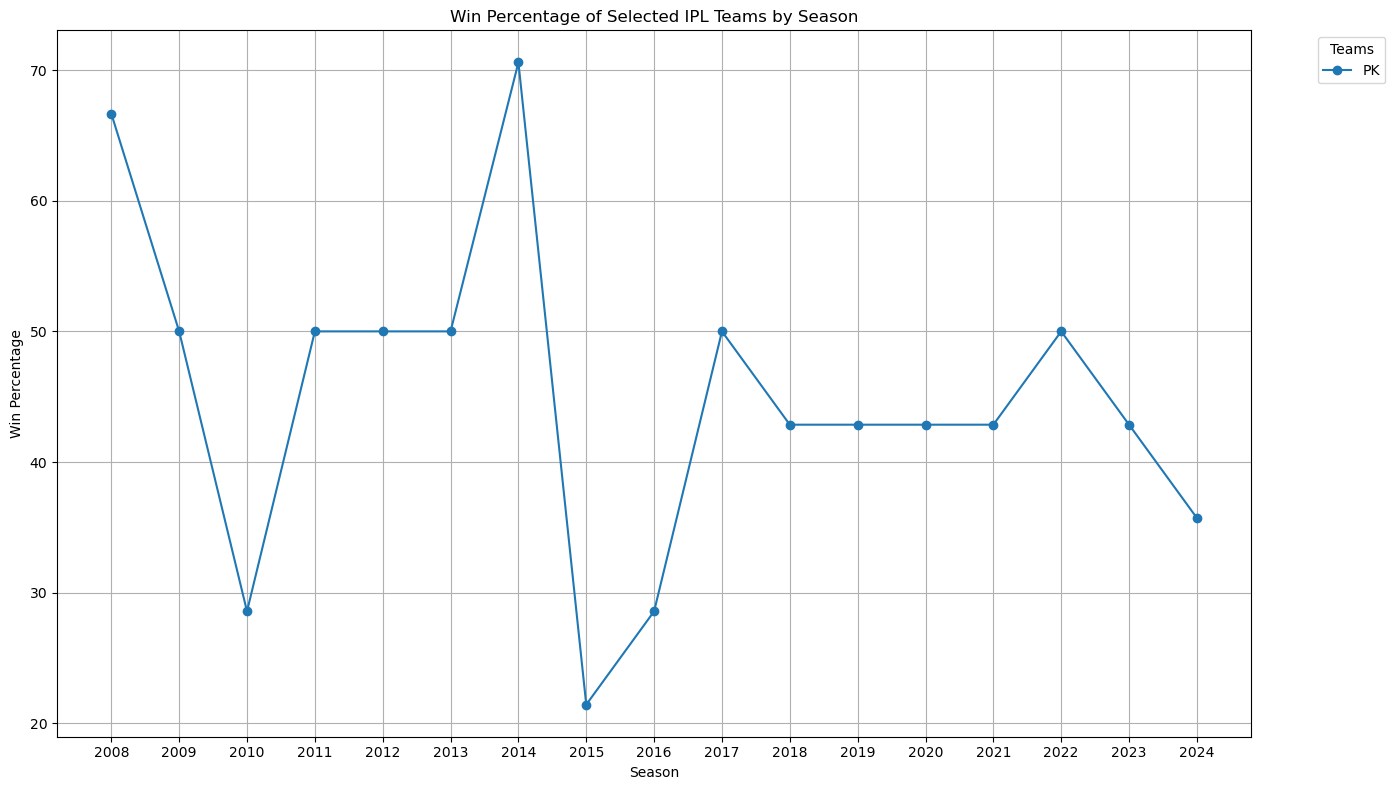

In [213]:
plot_team_win_percentage(["PK"])

## 3.3 Win Percentage when they Win the Toss

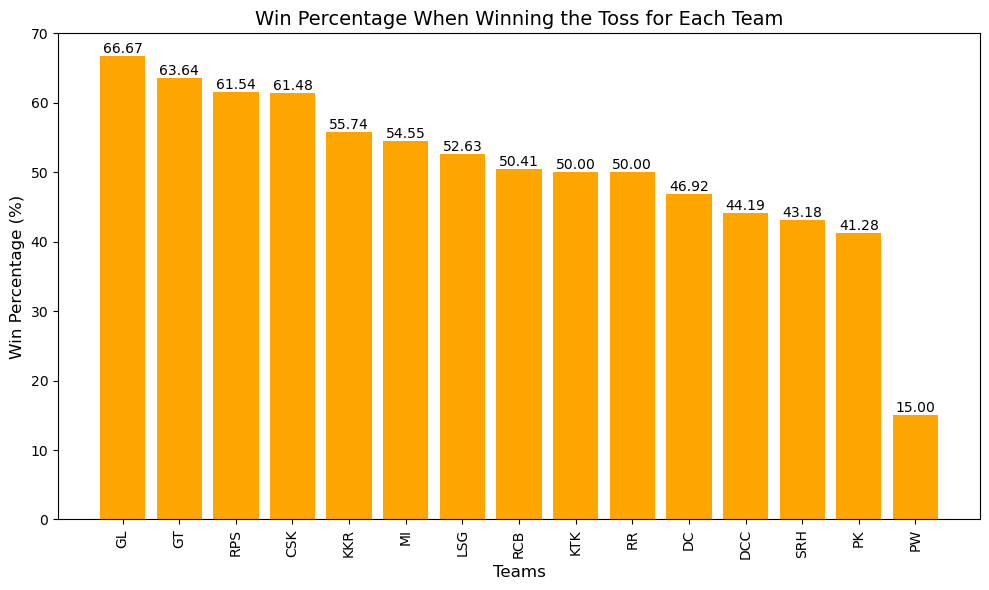

In [214]:
toss_wins = match['toss_winner'].value_counts()
toss_and_match_wins = match[match['toss_winner'] == match['winner']]['toss_winner'].value_counts()
win_percentage = (toss_and_match_wins / toss_wins * 100).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
bars = plt.bar(win_percentage.index, win_percentage.values, color='orange')
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f'{bar.get_height():.2f}', ha='center', va='bottom', fontsize=10)



plt.title("Win Percentage When Winning the Toss for Each Team", fontsize=14)
plt.xlabel("Teams", fontsize=12)
plt.ylabel("Win Percentage (%)", fontsize=12)
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability
plt.tight_layout()
plt.show()

## 3.4 Qualification Scenario of Teams Seasons

In [215]:
def team_season_stats(team):
    seasons_played = pd.concat([match[match['team1'] == team]['season'], match[match['team2'] == team]['season']]).nunique()
    finals = match[match['match_type'] == 'Final']
    finals_played = len(finals[((finals['team1'] == team) | (finals['team2'] == team))])
    winning_seasons = len(finals[finals['winner'] == team]['season'].unique())
    qualified_codn = match[match["match_type"] != "League"]
    qualified_seasons = len(qualified_codn[(qualified_codn['team1'] == team) | (qualified_codn['team2'] == team)]['season'].unique())

    return {
        'seasons_played': seasons_played,
        'finals_played': finals_played,
        'winning_seasons': winning_seasons,
        'qualified_seasons': qualified_seasons
    }
        

In [216]:
team_stats = team_season_stats("RCB")
print(team_stats)

{'seasons_played': 17, 'finals_played': 3, 'winning_seasons': 0, 'qualified_seasons': 9}


## 3.5 Performance on Home Ground

In [217]:
match["venue"].unique()

array(['M Chinnaswamy Stadium',
       'Punjab Cricket Association Stadium, Mohali', 'Feroz Shah Kotla',
       'Wankhede Stadium', 'Eden Gardens', 'Sawai Mansingh Stadium',
       'Rajiv Gandhi International Stadium, Uppal',
       'MA Chidambaram Stadium, Chepauk', 'Dr DY Patil Sports Academy',
       'Newlands', "St George's Park", 'Kingsmead', 'SuperSport Park',
       'Buffalo Park', 'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Brabourne Stadium',
       'Sardar Patel Stadium, Motera', 'Barabati Stadium',
       'Brabourne Stadium, Mumbai',
       'Vidarbha Cricket Association Stadium, Jamtha',
       'Himachal Pradesh Cricket Association Stadium', 'Nehru Stadium',
       'Holkar Cricket Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Subrata Roy Sahara Stadium',
       'Maharashtra Cricket Association Stadium',
       'Shaheed Veer Narayan Singh International Stadium',
       'JSCA International Stadium Complex', 'Sh

In [218]:
teams_homeground = {
    "CSK": "MA Chidambaram Stadium, Chepauk",
    "MI": "Wankhede Stadium",
    "RCB": "M Chinnaswamy Stadium",
    "KKR": "Eden Gardens",
    "SRH": "Rajiv Gandhi International Stadium, Uppal",
    "DC": "Arun Jaitley Stadium",
    "PK": "Punjab Cricket Association IS Bindra Stadium, Mohali",
    "RR": "Sawai Mansingh Stadium",
    "LSG": "Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cricket Stadium, Lucknow",
    "GT": "Narendra Modi Stadium, Ahmedabad"
}

In [219]:
win_percentages = {}

# Iterate through each team
for team, home_ground in teams_homeground.items():
    # Filter matches where the team played at their home ground
    home_matches = match[(match['team1'] == team) | (match['team2'] == team)]
    home_matches = home_matches[home_matches['venue'] == home_ground]
    
    # Calculate wins for the team
    home_wins = home_matches[home_matches['winner'] == team].shape[0]
    
    # Calculate total matches played at home ground
    total_home_matches = home_matches.shape[0]
    
    # Calculate win percentage
    if total_home_matches > 0:
        win_percentage = (home_wins / total_home_matches) * 100
    else:
        win_percentage = 0
    
    # Store the win percentage for the team
    win_percentages[team] = win_percentage

# Display the win percentages for all teams
for team, percentage in win_percentages.items():
    print(f"{team} Homeground Win Percentage: {percentage:.2f}%")


CSK Homeground Win Percentage: 70.21%
MI Homeground Win Percentage: 62.69%
RCB Homeground Win Percentage: 47.54%
KKR Homeground Win Percentage: 60.81%
SRH Homeground Win Percentage: 66.67%
DC Homeground Win Percentage: 57.14%
PK Homeground Win Percentage: 36.36%
RR Homeground Win Percentage: 68.09%
LSG Homeground Win Percentage: 50.00%
GT Homeground Win Percentage: 56.25%


## 4.Toss Analysis 
## 4.1 Wins Toss and wins match

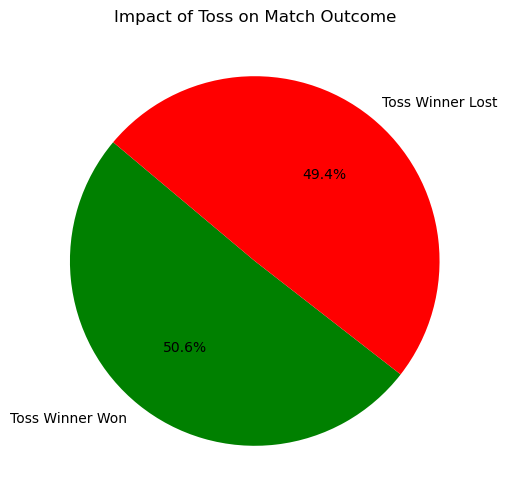

In [220]:
toss_winner_wins = match[match["toss_winner"] == match["winner"]].shape[0]


total_matches = match.shape[0]


toss_winner_loses = total_matches - toss_winner_wins


toss_data = [toss_winner_wins, toss_winner_loses]
labels = ['Toss Winner Won', 'Toss Winner Lost']


plt.figure(figsize=(8, 6))
plt.pie(toss_data, labels=labels, autopct='%1.1f%%', startangle=140, colors=['green', 'red'])
plt.title('Impact of Toss on Match Outcome')
plt.show()

## 4.2 Toss decision 

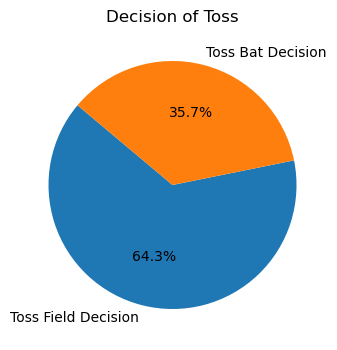

In [221]:

toss_field = match[match["toss_decision"] == "field"].shape[0]


toss_bat = match[match["toss_decision"] == "bat"].shape[0]

toss_data = [toss_field, toss_bat]
labels = ['Toss Field Decision', 'Toss Bat Decision']


plt.figure(figsize=(4, 6))
plt.pie(toss_data, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#1f77b4', '#ff7f0e'])
plt.title('Decision of Toss')
plt.show()


## 4.3 Win Count at Toss decision

In [222]:
field  =  match[match["toss_decision"] == "field"]
field_winner = field[field["toss_winner"] == field["winner"]]

bat =  match[match["toss_decision"] == "bat"]
bat_winner = bat[bat["toss_winner"] == bat["winner"]]


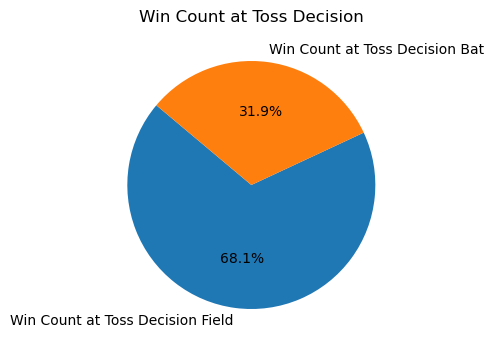

In [223]:
toss_deci = [field_winner.shape[0],bat_winner.shape[0]]
labels = ['Win Count at Toss Decision Field', 'Win Count at Toss Decision Bat ']


plt.figure(figsize=(4, 6))
plt.pie(toss_deci, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#1f77b4', '#ff7f0e'])
plt.title('Win Count at Toss Decision')
plt.show()

## 5. Venue Analysis 

## 5.1 Average Score For Defending

In [245]:

defending_matches = match[match['result'] == 'runs']

avg_defending_score_by_venue = defending_matches.groupby('venue')['target_runs'].mean().reset_index()


avg_defending_score_by_venue.columns = ['venue', 'avg_defending_score']


print(avg_defending_score_by_venue.sort_values(by ="avg_defending_score",ascending=False))


                                                venue  avg_defending_score
19                             Holkar Cricket Stadium           246.000000
12  Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...           232.500000
1                         Arun Jaitley Stadium, Delhi           221.333333
23                   M Chinnaswamy Stadium, Bengaluru           208.750000
18  Himachal Pradesh Cricket Association Stadium, ...           208.000000
15                              Eden Gardens, Kolkata           205.625000
55                           Wankhede Stadium, Mumbai           200.222222
42  Rajiv Gandhi International Stadium, Uppal, Hyd...           200.142857
3                 Barsapara Cricket Stadium, Guwahati           199.000000
6                           Brabourne Stadium, Mumbai           198.750000
38  Punjab Cricket Association IS Bindra Stadium, ...           195.666667
5                                   Brabourne Stadium           194.666667
31                   Nare

## 5.2 Average Score for Chasing 

In [242]:
chasing_matches = match[match['result'] == 'wickets']

avg_chasing_score_by_venue = chasing_matches.groupby('venue')['target_runs'].mean().reset_index()


avg_chasing_score_by_venue.columns = ['venue', 'avg_chasing_score']


print(avg_chasing_score_by_venue.sort_values(by =  'avg_chasing_score',ascending=False))


                                                venue  avg_chasing_score
18  Himachal Pradesh Cricket Association Stadium, ...         188.000000
14                              Eden Gardens, Kolkata         187.625000
38  Punjab Cricket Association IS Bindra Stadium, ...         184.500000
23                   M Chinnaswamy Stadium, Bengaluru         181.833333
46                     Sawai Mansingh Stadium, Jaipur         179.000000
24                              M.Chinnaswamy Stadium         177.857143
42  Rajiv Gandhi International Stadium, Uppal, Hyd...         176.833333
1                         Arun Jaitley Stadium, Delhi         172.714286
36       Punjab Cricket Association IS Bindra Stadium         170.666667
44             Saurashtra Cricket Association Stadium         164.500000
31                   Narendra Modi Stadium, Ahmedabad         163.666667
55                           Wankhede Stadium, Mumbai         163.370370
16                                         Green Pa

## 6.Matches with SuperOver


In [224]:
match["super_over"].value_counts()

super_over
N    1081
Y      14
Name: count, dtype: int64

## 7.Matches with Rain


In [225]:
match["method"].value_counts()

method
D/L    21
Name: count, dtype: int64

## 8.Matches with Small Margins and Big Margins

## 8.1 By Runs

In [240]:
run_wins = match[match["result"] == "runs"]
highest_run_margins = run_wins.nlargest(3, "result_margin")
bottom_run_margins = run_wins.nsmallest(3, "result_margin")

## 8.2 By Wickets

In [241]:
wicket_wins = match[match["result"] == "wickets"]
highest_wicket_margins =wicket_wins.nlargest(3, "result_margin")
bottom_wicket_margins = wicket_wins.nsmallest(3, "result_margin")

## 9.Comparator for Teams

In [253]:
def comparator(team1):
    teams=['MI','KKR','RCB','DC','CSK','RR','DC','GL','PK','SRH','RPS','KTK','PW']
    teams.remove(team1)
    opponents=teams.copy()
    mt1=match[((match['team1']==team1)|(match['team2']==team1))]
    for i in opponents:
        mask = (((mt1['team1']==i)|(mt1['team2']==i)))&((mt1['team1']==team1)|(mt1['team2']==team1))
        mt2 = mt1.loc[mask, 'winner'].value_counts().to_frame().T
        print(mt2)
    
comparator('MI')


winner  MI  KKR
count   23   11
winner  MI  RCB
count   19   14
winner  MI  DC
count   19  16
winner  MI  CSK
count   20   17
winner  MI  RR
count   15  14
winner  MI  DC
count   19  16
winner  GL  MI
count    2   2
winner  MI  PK
count   17  15
winner  MI  SRH
count   13   10
winner  RPS  MI
count     4   2
winner  KTK
count     1
winner  MI  PW
count    5   1


## 10.Highest Man of Matches

In [257]:
match["player_of_match"].value_counts().sort_values(ascending = False).head(10)

player_of_match
AB de Villiers    25
CH Gayle          22
RG Sharma         19
V Kohli           18
DA Warner         18
MS Dhoni          17
SR Watson         16
YK Pathan         16
RA Jadeja         16
AD Russell        15
Name: count, dtype: int64